In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
# %matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

color_list = sns.color_palette()

### CIFAR10

In [14]:
numval = 5
numseed = 6

psnr_ndpca = [[16.32, 17.71, 19.26, 20.18, 20.22],
              [16.26, 17.61, 19.19, 20.07, 20.15],
              [16.32, 17.72, 19.34, 20.17, 20.2], 
              [16.33, 17.72, 19.35, 20.34, 20.45],
              [16.33, 17.73, 19.36, 20.17, 20.21],
              [16.32, 17.71, 19.19, 20.2, 20.43]]
Z = [8, 16, 32, 48, 64]
Z1 = [[8, 16, 31, 42, 54],
      [8, 16, 31, 41, 52],
      [8, 16, 30, 39, 48],
      [8, 16, 31, 41, 53],
      [8, 16, 31, 41, 53],
      [8, 16, 31, 41, 53]]

psnr_ndpca = np.array(psnr_ndpca).T

Z = np.array(Z).T
Z1 = np.array(Z1).T

Z2 = np.zeros((numval, numseed))
### calculate Z2 = Z - Z1
for i in range(numval):
	for j in range(numseed):
		# Z1[i, j] = int(Z[i] / 2)
		Z2[i, j] = Z[i] - Z1[i, j]
		# print(Z[i], Z1[i, j], Z2[i, j])

Z1 = [[8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64]]    

Z1 = np.array(Z1).T

In [15]:
cifar_df = pd.DataFrame()
### add columns
for i in range(len(psnr_ndpca)): ### latent dim
    for j in range(len(psnr_ndpca[0])): ### seed
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_ndpca[i, j], 'method': 'NDPCA (ours)', 'seed': j}, ignore_index=True)

print(cifar_df.head())

   dpca_dim  Z1   Z2   psnr        method  seed
0         8   8  0.0  16.32  NDPCA (ours)     0
1         8   8  0.0  16.26  NDPCA (ours)     1
2         8   8  0.0  16.32  NDPCA (ours)     2
3         8   8  0.0  16.33  NDPCA (ours)     3
4         8   8  0.0  16.33  NDPCA (ours)     4


### PnP

In [16]:
pnp_df = pd.read_csv('./lift.csv') # seed 0 ep 349
pnp_df.drop(columns=['dim of z2 private'], inplace=True)
pnp_df.rename(columns={"dim of z1 private": "Z1", "dim of z1 share": "Z2"}, inplace=True)
idx = pnp_df[(pnp_df['method'] == 'No NDPCA') & (pnp_df['seed'] == 0)].index
pnp_df.drop(idx, inplace=True)
pnp_df.tail()

,dpca_dim,success rate,Z1,Z2,seed,method
79,20,0.14,6,0,2,Task-agnostic NDPCA
80,16,0.22,5,0,2,Task-agnostic NDPCA
81,12,0.14,4,0,2,Task-agnostic NDPCA
82,8,0.18,2,0,2,Task-agnostic NDPCA
83,4,0.09,0,0,2,Task-agnostic NDPCA


### Airbus

In [17]:
airbus_df = pd.read_csv('./airbus.csv') # seed 0 ep 349
airbus_df.drop(columns=['dim of z2 private'], inplace=True)
airbus_df.rename(columns={"dim of z1 private": "Z1", "dim of z1 share": "Z2"}, inplace=True)
airbus_df

,dpca_dim,Z1,Z2,testmAP,seed,method
0,4,4,0,0.220770,0,NDPCA (ours)
1,8,6,2,0.439348,0,NDPCA (ours)
2,12,9,3,0.617028,0,NDPCA (ours)
3,16,12,4,0.729553,0,NDPCA (ours)
4,20,14,6,0.750393,0,NDPCA (ours)
5,24,17,7,0.759583,0,NDPCA (ours)
6,28,19,9,0.765360,0,NDPCA (ours)
7,32,23,9,0.767108,0,NDPCA (ours)
8,36,25,11,0.766823,0,NDPCA (ours)
9,40,27,13,0.768046,0,NDPCA (ours)


### Plots

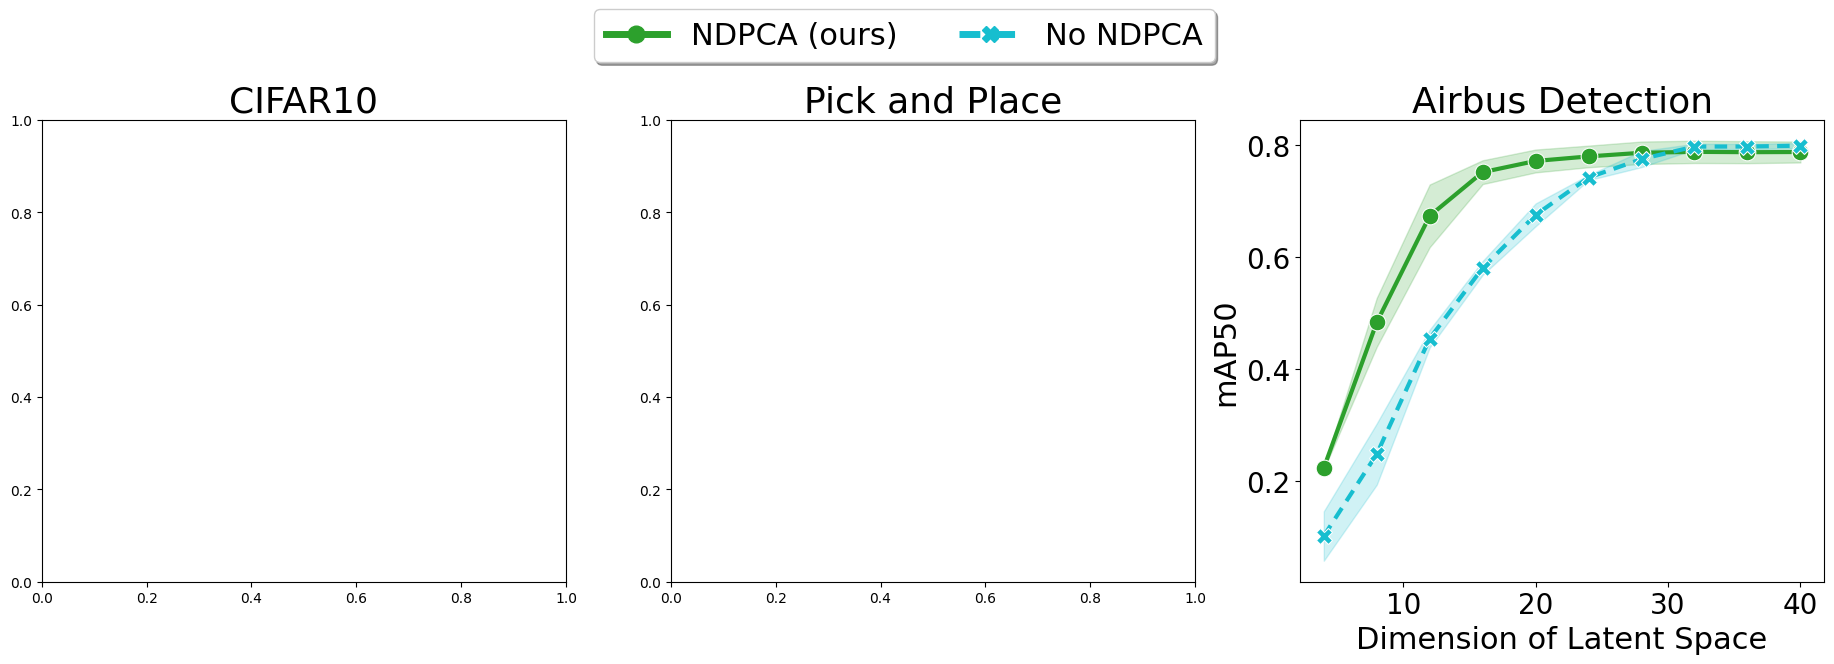

In [18]:
fig, ax_list = plt.subplot_mosaic(
        [["cifar_dpca", "pnp_dpca", "airbus_dpca"]], figsize=(23, 6))

xylabelsize = 22
titlesize = 26
legendsize = 22
ticksize = 20

### set title
ax_list["cifar_dpca"].set_title("CIFAR10", fontsize=titlesize)
ax_list["pnp_dpca"].set_title("Pick and Place", fontsize=titlesize)
ax_list["airbus_dpca"].set_title("Airbus Detection", fontsize=titlesize)


### plot cifar denoising
## plot DPCA curve

### Plot AirBus Detection
## plot DPCA curve
ax6 = sns.lineplot(data=airbus_df, x="dpca_dim", y="testmAP", ax=ax_list["airbus_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[9]], dashes=['', (3,2)], markers=True, markersize=12)
ax_list["airbus_dpca"].set_xlabel("Dimension of Latent Space", fontsize=xylabelsize)
ax_list["airbus_dpca"].set_ylabel("mAP50", fontsize=xylabelsize)
ax_list["airbus_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["airbus_dpca"].legend()
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax_list["airbus_dpca"].legend().remove()

### Generate a legend for the first line only
lines_labels = [ax.get_legend_handles_labels() for ax in [ax_list["airbus_dpca"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.09), fancybox=True, shadow=True, ncol=7, fontsize=22, markerscale=2)
for line in lgd.get_lines():
    line.set_linewidth(5.0)
plt.show()
fig.savefig('./ablation_results.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')